Files already downloaded and verified
Files already downloaded and verified
model pretrained: 1


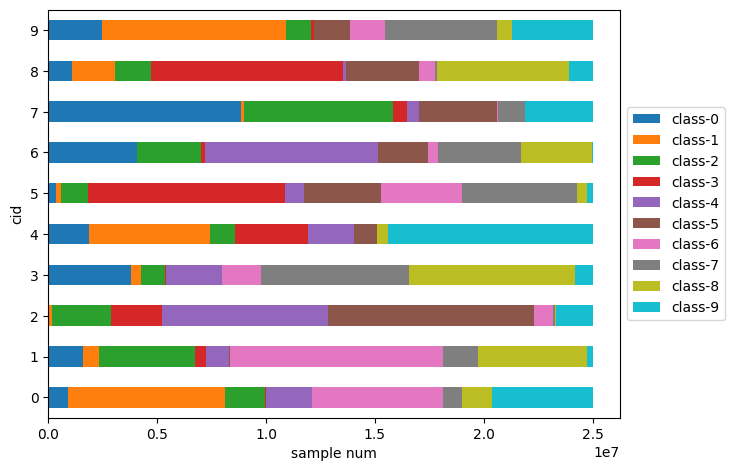

09:56:08 - root - INFO - Client 1, noise level: 0.3116 (0.2805), real noise ratio: 0.2856
09:56:08 - root - INFO - Client 3, noise level: 0.4202 (0.3782), real noise ratio: 0.3776
09:56:08 - root - INFO - Client 5, noise level: 0.3041 (0.2737), real noise ratio: 0.2708
09:56:08 - root - INFO - Client 8, noise level: 0.3425 (0.3082), real noise ratio: 0.2956


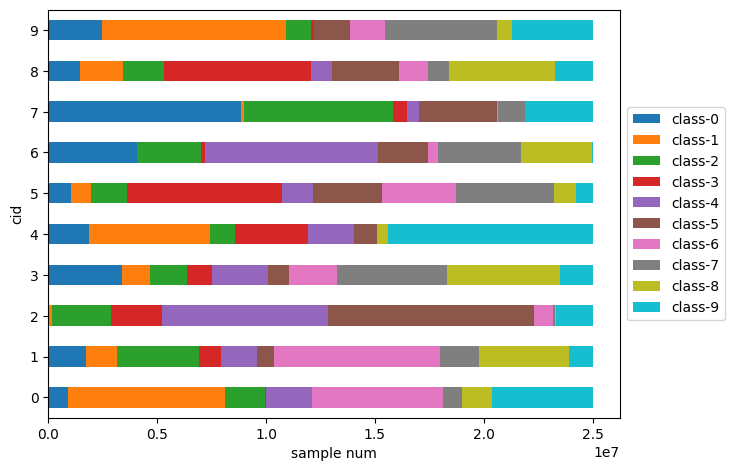

In [6]:
import sys
import os
import copy
import torch
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

sys.path.append("../")

cwd = os.getcwd()
project_root = os.path.abspath(os.path.join(cwd, "../.."))
sys.path.append(project_root)

# configuration
from munch import Munch
from fedlab.models.mlp import MLP
from fedlab.models.build_model import build_model
from fedlab.utils.dataset.functional import partition_report
from fedlab.utils.fednoro_utils import add_noise, set_seed, set_output_files, get_output, get_current_consistency_weight, identify_noise_type

args = Munch

args.total_client = 10
args.alpha = 0.5
args.seed = 42
args.preprocess = True
args.cuda = False
args.dataname = "cifar10"
args.model = "Resnet18"
args.pretrained = 1
args.num_users = args.total_client

if args.dataname == "cifar10":
    args.n_classes = 10

#args.device = "cuda" if torch.cuda.is_available() else "cpu"
args.device = "cpu"



# We provide a example usage of patitioned CIFAR10 dataset
# Download raw CIFAR10 dataset and partition them according to given configuration

from torchvision import transforms
from fedlab.contrib.dataset.partitioned_cifar10 import PartitionedCIFAR10

fed_cifar10 = PartitionedCIFAR10(root="../datasets/cifar10/",
                         path="../datasets/cifar10/fedcifar10/",
                         dataname = args.dataname,
                         num_clients=args.total_client,
                         partition="iid",
                         dir_alpha=args.alpha,
                         seed=args.seed,
                         preprocess=args.preprocess,
                         download=True,
                         verbose=True,
                         transform=transforms.ToTensor())

dataset = fed_cifar10.get_dataset(0) # get the 0-th client's dataset
dataloader = fed_cifar10.get_dataloader(0, batch_size=128) # get the 0-th client's dataset loader with batch size 128

model = build_model(args)

# generate partition report
csv_file = "./partition-reports/cifar10_hetero_dir_0.3_10clients.csv"
partition_report(fed_cifar10.targets_train, fed_cifar10.data_indices_train, 
                 class_num=args.n_classes, 
                 verbose=False, file=csv_file)


hetero_dir_part_df = pd.read_csv(csv_file,header=0)
hetero_dir_part_df = hetero_dir_part_df.set_index('cid')
col_names = [f"class-{i}" for i in range(args.n_classes)]
for col in col_names:
    hetero_dir_part_df[col] = (hetero_dir_part_df[col] * hetero_dir_part_df['TotalAmount']).astype(int)

#select first 10 clients for bar plot
hetero_dir_part_df[col_names].iloc[:10].plot.barh(stacked=True)  
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"./imgs/cifar10_hetero_dir_0.3_10clients.png", dpi=400, bbox_inches = 'tight')
plt.show()

#noise
args.level_n_lowerb = 0.3
args.level_n_upperb = 0.5
args.level_n_system = 0.4
args.n_type = "random"

y_train = np.array(fed_cifar10.targets_train)
y_train_noisy, gamma_s, real_noise_level = add_noise(args, y_train, fed_cifar10.data_indices_train)
fed_cifar10.targets_train = y_train_noisy

# generate partition report
csv_file = "./partition-reports/cifar10_dir_aft_noise_0.3_10clients.csv"
partition_report(fed_cifar10.targets_train, fed_cifar10.data_indices_train, 
                 class_num=args.n_classes, 
                 verbose=False, file=csv_file)


hetero_dir_part_df = pd.read_csv(csv_file,header=0)
hetero_dir_part_df = hetero_dir_part_df.set_index('cid')
col_names = [f"class-{i}" for i in range(args.n_classes)]
for col in col_names:
    hetero_dir_part_df[col] = (hetero_dir_part_df[col] * hetero_dir_part_df['TotalAmount']).astype(int)

#select first 10 clients for bar plot
hetero_dir_part_df[col_names].iloc[:10].plot.barh(stacked=True)  
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"./imgs/cifar10_dir_aft_noise_0.3_10clients.png", dpi=400, bbox_inches = 'tight')
plt.show()

Training on client 3: 100%|██████████| 1/1 [03:49<00:00, 229.28s/it]


Round 0, Loss 11.3808, Test Accuracy 0.1130


Training on client 1: 100%|██████████| 1/1 [03:49<00:00, 229.66s/it]


Round 1, Loss 91.8789, Test Accuracy 0.1457


Training on client 6: 100%|██████████| 1/1 [03:50<00:00, 230.86s/it]


Round 2, Loss 19.4409, Test Accuracy 0.0920


Training on client 3: 100%|██████████| 1/1 [03:53<00:00, 233.05s/it]


Round 3, Loss 6.5741, Test Accuracy 0.1757


Training on client 8: 100%|██████████| 1/1 [03:46<00:00, 226.32s/it]


Round 4, Loss 5.1590, Test Accuracy 0.1295


Training on client 1: 100%|██████████| 1/1 [03:52<00:00, 232.26s/it]


Round 5, Loss 3.4473, Test Accuracy 0.2197


Training on client 6: 100%|██████████| 1/1 [03:49<00:00, 229.48s/it]


Round 6, Loss 9.0387, Test Accuracy 0.1646


Training on client 5: 100%|██████████| 1/1 [03:50<00:00, 230.42s/it]


Round 7, Loss 19.9757, Test Accuracy 0.1000


Training on client 1: 100%|██████████| 1/1 [03:51<00:00, 231.40s/it]


Round 8, Loss 59.6578, Test Accuracy 0.1510


Training on client 4: 100%|██████████| 1/1 [04:29<00:00, 269.36s/it]


Round 9, Loss 6.2630, Test Accuracy 0.1130


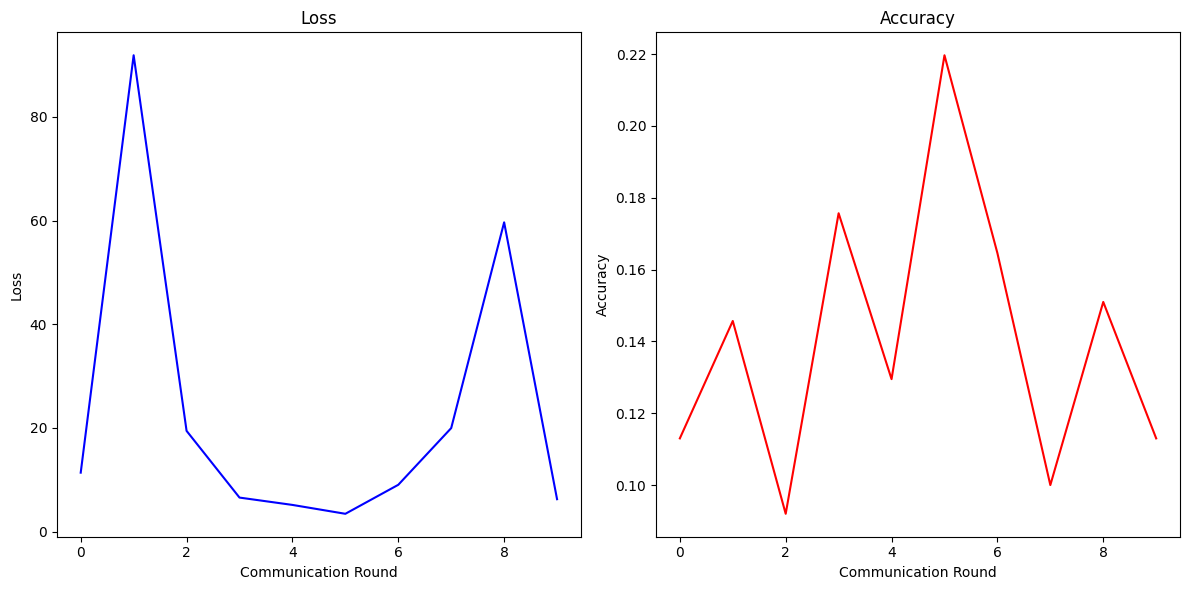

In [7]:

# client
from fedlab.contrib.algorithm.basic_client import SGDSerialClientTrainer, SGDClientTrainer

# local train configuration
args.epochs = 5
args.batch_size = 128
args.lr = 0.1

trainer = SGDSerialClientTrainer(model, args.total_client, cuda=args.cuda) # serial trainer
# trainer = SGDClientTrainer(model, cuda=True) # single trainer

trainer.setup_dataset(fed_cifar10)
trainer.setup_optim(args.epochs, args.batch_size, args.lr)

# server
from fedlab.contrib.algorithm.basic_server import SyncServerHandler

# global configuration
args.com_round = 10
args.sample_ratio = 0.1

handler = SyncServerHandler(model=model, global_round=args.com_round, sample_ratio=args.sample_ratio, cuda=args.cuda)

from fedlab.utils.functional import evaluate
from fedlab.core.standalone import StandalonePipeline

from torch import nn
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt
import numpy as np

from fedlab.utils.functional import evaluate
from fedlab.core.standalone import StandalonePipeline

from torch import nn
from torch.utils.data import DataLoader
import torchvision

class EvalPipeline(StandalonePipeline):
    def __init__(self, handler, trainer, test_loader):
        super().__init__(handler, trainer)
        self.test_loader = test_loader 
        self.loss = []
        self.acc = []
        
    def main(self):
        t=0
        while self.handler.if_stop is False:
            # server side
            sampled_clients = self.handler.sample_clients()
            broadcast = self.handler.downlink_package
            
            # client side
            self.trainer.local_process(broadcast, sampled_clients)
            uploads = self.trainer.uplink_package

            # server side
            for pack in uploads:
                self.handler.load(pack)

            loss, acc = evaluate(self.handler.model, nn.CrossEntropyLoss(), self.test_loader)
            print("Round {}, Loss {:.4f}, Test Accuracy {:.4f}".format(t, loss, acc))
            t+=1
            self.loss.append(loss)
            self.acc.append(acc)
    
    def show(self):
        plt.figure(figsize=(8,4.5))
        ax = plt.subplot(1,2,1)
        ax.plot(np.arange(len(self.loss)), self.loss)
        ax.set_xlabel("Communication Round")
        ax.set_ylabel("Loss")
        
        ax2 = plt.subplot(1,2,2)
        ax2.plot(np.arange(len(self.acc)), self.acc)
        ax2.set_xlabel("Communication Round")
        ax2.set_ylabel("Accuarcy")
        
        
test_data = torchvision.datasets.CIFAR10(root="../datasets/cifar10/",
                                       train=False,
                                       transform=transforms.ToTensor())
test_loader = DataLoader(test_data, batch_size=1024)

standalone_eval = EvalPipeline(handler=handler, trainer=trainer, test_loader=test_loader)
standalone_eval.main()

standalone_eval.show()